## Efficient Frontier 2 Assets


In [1]:
%load_ext autoreload
%autoreload 2
import edhec_risk_kit as erk
import numpy as np

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [2]:
l = ["food", "beer", "smoke", "coal"] 
er[l]

food     0.116799
beer     0.141126
smoke    0.107830
coal     0.414689
dtype: float64

In [3]:
cov.loc[l, l]

,food,beer,smoke,coal
food,0.002609,0.002379,0.002061,0.000027
beer,0.002379,0.005264,0.001359,0.001728
smoke,0.002061,0.001359,0.008349,-0.000733
coal,0.000027,0.001728,-0.000733,0.018641


In [4]:
weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [5]:
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [6]:
erk.portfolio_vol(weights, cov.loc[l, l])

0.055059195776437045

## 2 Asset Frontier

In [7]:
l = ["games", "fin"]

In [8]:
er[l]

games    0.068212
fin      0.223371
dtype: float64

In [9]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [10]:
len(weights)

20

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

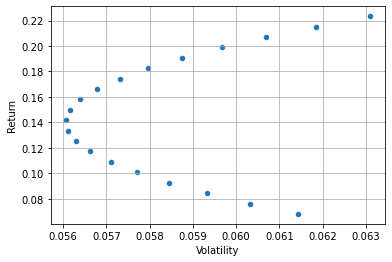

In [11]:
import pandas as pd

rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l, l]) for w in weights]

ef = pd.DataFrame(
    {
        "Return": rets, 
        "Volatility": vols
    }
)
ef.plot.scatter(x="Volatility", y="Return", grid=True)

<AxesSubplot:xlabel='Volatility'>

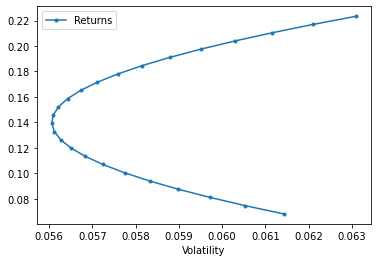

In [18]:
l = ["games", "fin"]
erk.plot_ef2(25, er[l], cov.loc[l, l])

<AxesSubplot:xlabel='Volatility'>

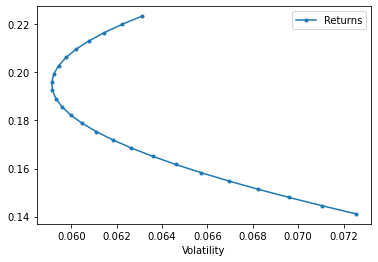

In [17]:
l = ["fin", "beer"]
erk.plot_ef2(25, er[l], cov.loc[l, l])

In [16]:
import edhec_risk_kit as erk
